In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 18

## Effective areas
Tells you how large of an ideal detector your analysis represents

In [3]:
exp15 = np.load('/data/ana/analyses/gfu/current/IC86_2015_data.npy')
mc = np.load('/data/ana/analyses/gfu/current/IC86_2011_MC.npy')

In [4]:
print("DATA: ", exp15.dtype.names)
print()
print("MONTE CARLO: ", mc.dtype.names)

DATA:  ('run', 'event', 'subevent', 'time', 'azi', 'zen', 'ra', 'dec', 'angErr', 'logE')

MONTE CARLO:  ('run', 'event', 'subevent', 'time', 'azi', 'zen', 'ra', 'dec', 'angErr', 'logE', 'trueAzi', 'trueZen', 'trueRa', 'trueDec', 'trueE', 'ow')


Effective area: for each bin in true neutrino energy, calculate effective area by adding the one weights and scaling for the bin size (in energy) and the fact that you are only looking at part of the sky, and correcting units

In [5]:
#Start with adding one weights for binned true neutrino energy
print('max true E in MC: 10^(',np.log(max(mc['trueE']))/np.log(10),')')
print('min true E in MC: 10^(',np.log(min(mc['trueE']))/np.log(10),')')
print('n data: ',len(mc['run']))

max true E in MC: 10^( 8.999999281950462 )
min true E in MC: 10^( 2.0000018210410966 )
n data:  9445204


In [6]:
#ow units: 1/(GeV cm^2 sr)
nbins=28
trueE_bins=np.logspace(2,9,num=nbins+1)
bin_corr=(9.-2.)/nbins

In [7]:
# want to sep based on angle: pi->-5 and -5->-pi
decmsk1=mc['trueDec']>(-5*np.pi/180)
decmsk2=mc['trueDec']<=(-5*np.pi/180)

cuts=[np.pi/2,-5*np.pi/180,-np.pi/2]
dec_msks=[decmsk1,decmsk2]

In [8]:
A_eff_w=[[],[]]
for a in range(len(dec_msks)):
    solid_ang=2*np.pi*(np.sin(cuts[a])-np.sin(cuts[a+1]))
    weight=mc['ow'][dec_msks[a]]/(mc['trueE'][dec_msks[a]]*solid_ang*bin_corr*1e4*np.log(10))
    for w in weight: A_eff_w[a].append(w)
#A_eff_w

In [10]:
#digitized data from Sam's paper
sam_effA_n = pd.read_csv('./sam_nsky.csv', header=None, names=['Enu','Aeff'])
sam_effA_s = pd.read_csv('./sam_ssky.csv', header=None, names=['Enu','Aeff'])
#sam_effA_s.head()

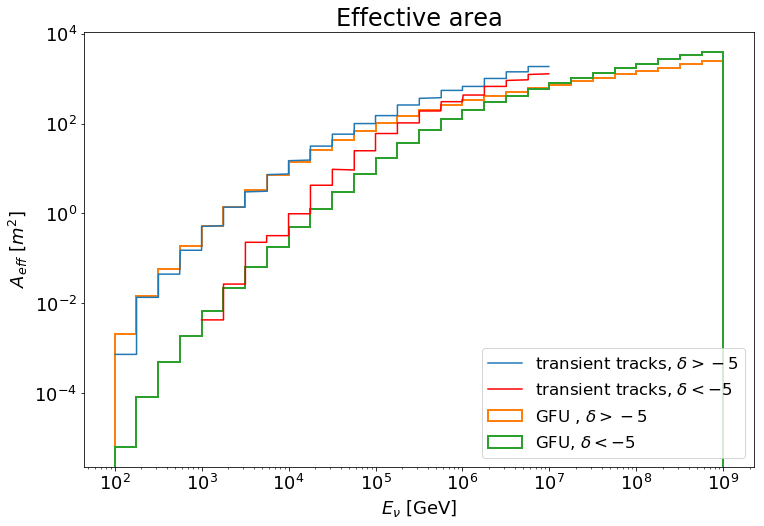

In [11]:
#print(len(A_eff_w[0]))
#print(len(mc['trueE'][dec_msks[0]]))
fig, ax = plt.subplots(figsize=(12,8))
mpl.rcParams['font.size'] = 20

plt.plot(sam_effA_n.Enu, sam_effA_n.Aeff, label=r'transient tracks, $\delta>-5$')
plt.plot(sam_effA_s.Enu, sam_effA_s.Aeff,color='red', label=r'transient tracks, $\delta<-5$')
plt.hist(mc['trueE'][dec_msks[0]], bins=trueE_bins, weights=A_eff_w[0],
         histtype='step', lw=2., label=r'GFU , $\delta>-5$')
plt.hist(mc['trueE'][dec_msks[1]], bins=trueE_bins, weights=A_eff_w[1],
         histtype='step', lw=2., label=r'GFU, $\delta<-5$')

plt.semilogx()
plt.semilogy()
plt.legend(loc=0, fontsize='small')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'$A_{eff}$ [$m^2$]') #r means latex only input
ax.set_title(r'Effective area')
plt.show()

In [13]:
#finer cuts
decmsk1=mc['trueDec']>(-5*np.pi/180)
decmsk2=mc['trueDec']<(-5*np.pi/180)
decmsk3=mc['trueDec']<(-30*np.pi/180)
decmsk4=mc['trueDec']>(-30*np.pi/180)
decmsk5=mc['trueDec']<(30*np.pi/180)
decmsk6=mc['trueDec']>(30*np.pi/180)

cuts2=[np.pi/2,30*np.pi/180,-5*np.pi/180,-30*np.pi/180,-np.pi/2]
dec_msks2=[decmsk3,decmsk4&decmsk2,decmsk1&decmsk5,decmsk6]

In [14]:
A_eff_w2=[[],[],[],[]]
for a in range(len(dec_msks2)):
    solid_ang=2*np.pi*(np.sin(cuts2[a])-np.sin(cuts2[a+1]))
    weight=mc['ow'][dec_msks2[a]]/(mc['trueE'][dec_msks2[a]]*solid_ang*bin_corr*1e4*np.log(10))
    for w in weight: A_eff_w2[a].append(w)

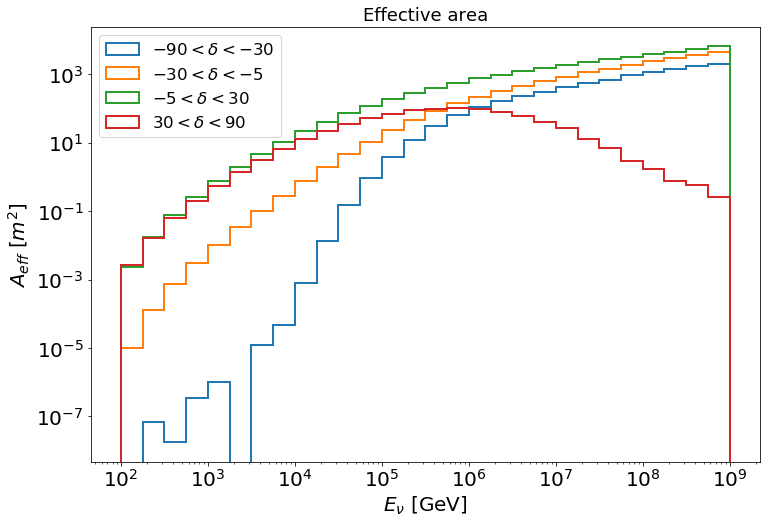

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(mc['trueE'][dec_msks2[0]], bins=trueE_bins, weights=A_eff_w2[0],
         histtype='step', lw=2., label=r'$-90<\delta<-30$')
plt.hist(mc['trueE'][dec_msks2[1]], bins=trueE_bins, weights=A_eff_w2[1],
         histtype='step', lw=2., label=r'$-30<\delta<-5$')
plt.hist(mc['trueE'][dec_msks2[2]], bins=trueE_bins, weights=A_eff_w2[2],
         histtype='step', lw=2., label=r'$-5<\delta<30$')
plt.hist(mc['trueE'][dec_msks2[3]], bins=trueE_bins, weights=A_eff_w2[3],
         histtype='step', lw=2., label=r'$30<\delta<90$')

plt.semilogx()
plt.semilogy()
plt.legend(loc=2, fontsize='small')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'$A_{eff}$ [$m^2$]') #r means latex only input
ax.set_title(r'Effective area', fontsize=18)
plt.show()

Looking at masks:

In [16]:
a = np.linspace(1, 20, 20)
msk1 = a>4
msk2 = a<10
msk = msk1 * msk2
a[msk]

array([5., 6., 7., 8., 9.])

In [17]:
np.where(a > 4, a, 0.)

array([ 0.,  0.,  0.,  0.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

## BG PDFS:
Make histograms of the `exp` files for that certain variable, ie BG declination pdf is a histogram of the `exp['dec']`
Maybe do this in `np.sin()`

In [18]:
exp15 = np.load('/data/ana/analyses/gfu/current/IC86_2015_data.npy')
exp16= np.load('/data/ana/analyses/gfu/current/IC86_2016_data.npy')
exp17= np.load('/data/ana/analyses/gfu/current/IC86_2017_data.npy')
exp18= np.load('/data/ana/analyses/gfu/current/IC86_2018_data.npy')
exp19= np.load('/data/ana/analyses/gfu/current/IC86_2019_data.npy')
#exp15.dtype.names

In [19]:
decs15=np.array(exp15['dec']) #in radians
decs16=exp16['dec']
decs17=exp17['dec']
decs18=exp18['dec']
decs19=exp19['dec']

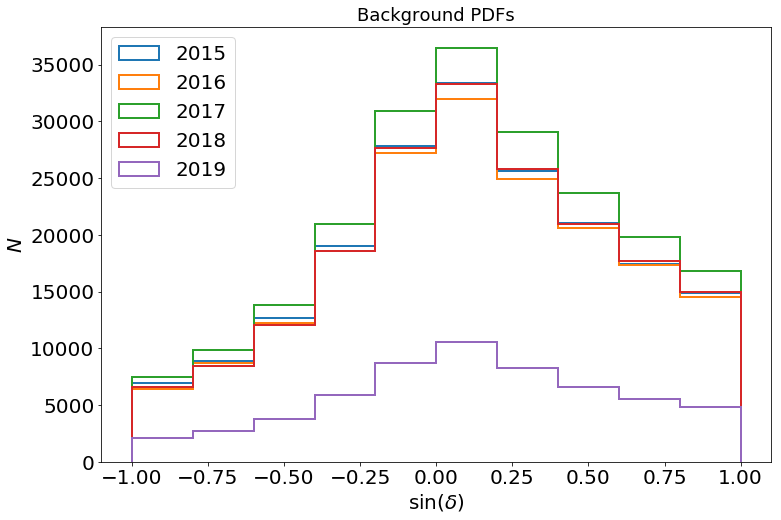

In [20]:
#dec_bins = np.linspace(((-np.pi/2)-0.05),((np.pi/2)+0.05),num=19) #dec bins for every 10 deg
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(np.sin(decs15), histtype='step', lw=2., label='2015')
plt.hist(np.sin(decs16), histtype='step', lw=2., label='2016')
plt.hist(np.sin(decs17), histtype='step', lw=2., label='2017')
plt.hist(np.sin(decs18), histtype='step', lw=2., label='2018')
plt.hist(np.sin(decs19), histtype='step', lw=2., label='2019')

plt.legend(loc=2)
plt.xlabel(r'sin($\delta$)')
plt.ylabel(r'$N$') #r means latex only input
ax.set_title(r'Background PDFs', fontsize=18)
plt.show()

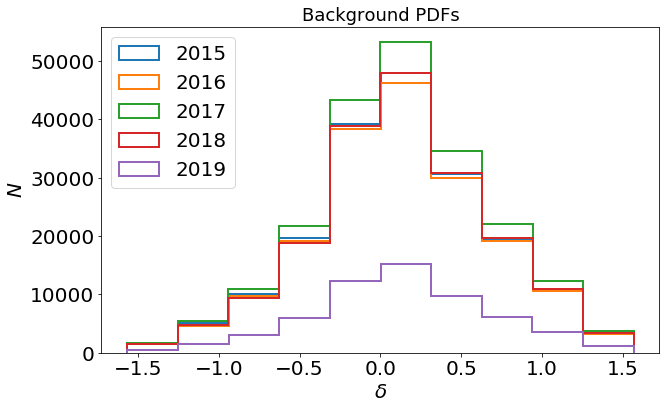

In [21]:
#dec instead of sin dec
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(decs15, histtype='step', lw=2., label='2015')
plt.hist(decs16, histtype='step', lw=2., label='2016')
plt.hist(decs17, histtype='step', lw=2., label='2017')
plt.hist(decs18, histtype='step', lw=2., label='2018')
plt.hist(decs19, histtype='step', lw=2., label='2019')

plt.legend(loc=2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$N$') #r means latex only input
ax.set_title(r'Background PDFs', fontsize=18)
plt.show()

## Rates
Make the rate as a function of time (in Hz or mHz) by using the "GRL" (GoodRunList)

Maybe group multiple sequential runs together to reduce statistical uncertainty

Maybe include poissonian errorbars (plt.errorbar instead of plt.plot)

('run', 'start', 'stop', 'livetime', 'events', 'good_i3')


<ErrorbarContainer object of 3 artists>

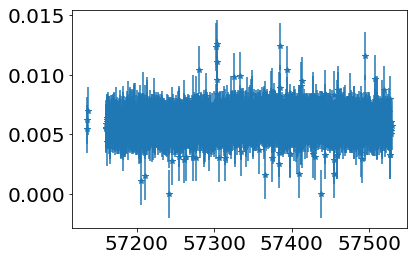

In [24]:
grl = np.load('/data/ana/analyses/gfu/current/GRL/IC86_2015_data.npy')
print(grl.dtype.names)
#run num, start time, stop time, total time, n events, true
plt.errorbar(grl['start'], grl['events']/grl['livetime']/86400., 
           yerr=0.002, linestyle='', marker='*')

In [25]:
60.*60.*24.

86400.0

In [26]:
#non-sequential runs
nonseq=[0]
for n in range(1,len(grl['start'])-1):
    if (grl['run'][n]-grl['run'][n-1]) != 1:
        nonseq.append(n-1)
nonseq.append(1311) #add for loop later
for n in range(1,len(nonseq)-1):
    ch2=nonseq[n]+1-nonseq[n-1]>=40
    if nonseq[n]+1-nonseq[n-1]>20 and nonseq[n]+1-nonseq[n-1]<40:
        nonseq.append(int((nonseq[n]-nonseq[n-1])/2)+nonseq[n-1])
    if nonseq[n]+1-nonseq[n-1]>=40:
        nonseq.append(int((nonseq[n]-nonseq[n-1])/4)+nonseq[n-1])
        nonseq.append(int((nonseq[n]-nonseq[n-1])/2)+nonseq[n-1])
        nonseq.append(int((nonseq[n]-nonseq[n-1])*3/2)+nonseq[n-1])
    nonseq.sort()
#for n in range(1,len(nonseq)-1):
#    print(nonseq[n]+1-nonseq[n-1])

In [27]:
seq_grl={'start':[],'events':[],'livetime':[],'rate':[],'poisson_err':[]}
for n in range(len(nonseq)-1):
    seq_grl['start'].append(grl['start'][nonseq[n]])
    seq_events=0
    seq_livetime=0
    for r in range(nonseq[n],nonseq[n+1]+1):
        seq_events+=grl['events'][r]
        seq_livetime+=grl['livetime'][r]
    seq_grl['events'].append(seq_events)
    seq_grl['livetime'].append(seq_livetime)
    seq_grl['rate'].append(seq_events/seq_livetime/86400.)
    seq_grl['poisson_err'].append(np.sqrt(seq_events)/seq_livetime/86400.)
    #print(nonseq[n+1]+1-nonseq[n])

#print(seq_grl['events'])
#print(seq_grl['rate'])

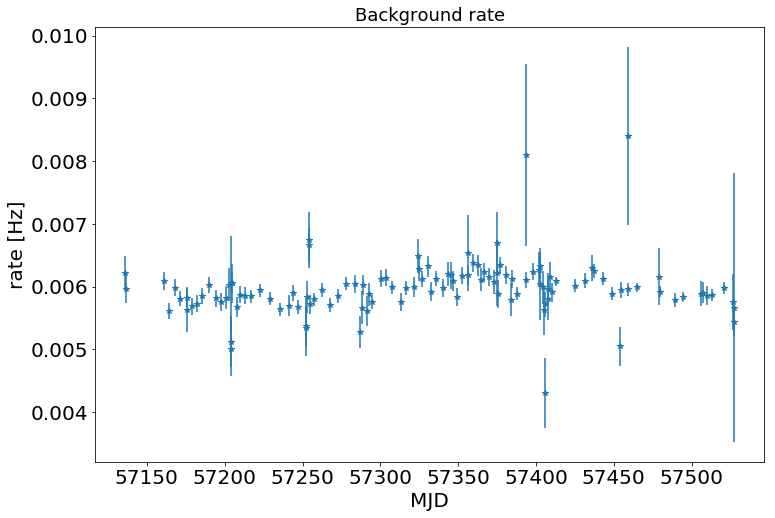

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
plt.errorbar(seq_grl['start'], seq_grl['rate'], 
           yerr=seq_grl['poisson_err'], linestyle='', marker='*')
plt.xlabel(r'MJD')
plt.ylabel(r'rate [Hz]') #r means latex only input
ax.set_title(r'Background rate', fontsize=18)
plt.show()